In [20]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import logging                                                                 
from tqdm import tqdm                                                                                                                                                                                                                                                     
import matplotlib.pyplot as plt                                                                                                                                                                                                                                           

import pandas as pd
import numpy as np

from torchvision import utils
import matplotlib.pyplot as plt
import torch
import yaml

def show(img, title='',cmap='plasma'):
    print(img.shape, img.min(), img.max())
    plt.figure(figsize=(15,10))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.show()
    
def show_tensor(tensor,title='',cmap='plasma'):
    img = utils.make_grid(tensor).detach().cpu().numpy().transpose(1,2,0)
    show(img, title=title,cmap='plasma')
    
def parse_configs(config):
    with open(config, 'r') as stream:
        try:
            configs=yaml.safe_load(stream)
            return configs
        except yaml.YAMLError as exc:
            logging.error(exc)
            return {}
        
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from glob import glob
from Image_ZoomIn import *
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(1024, 928, 4) 0.0 1.0


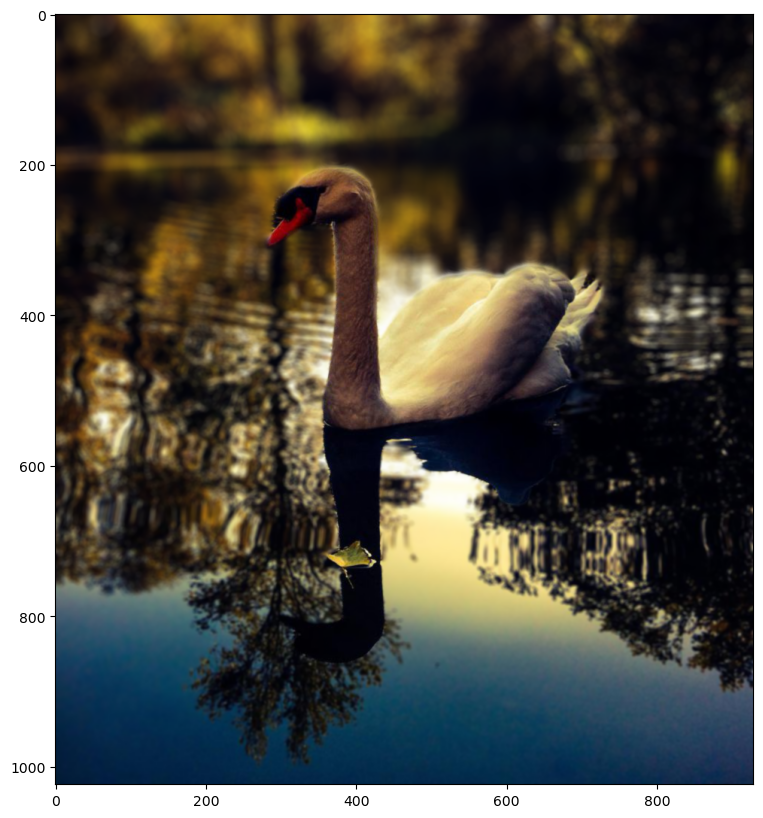

In [2]:
img = plt.imread('00156_Classic.png')
show(img)

In [26]:
f1 = '00156_Classic.png' 
f2 = '00156_DScatter.png' 

img1 = plt.imread(f1)
img2 = plt.imread(f2)

top_left = [190, 240]
boundary_params = {
    'hpatch': 250,
    'wpatch': 250,
    'padding': 10,
    'color': np.array([255, 44, 44]) / 255.0
}

def zoomin_crop(img, top_left, boundary_params):
    ret, patch = zoom_in(img, top_left, boundary_params)
    h, w = patch.shape[:2]
    
    # put at the bottom-right corner
    ret[-h*2:, -w*2:, :3] = cv2.resize(patch, (h * 2, w * 2))
    return ret


ret1 = zoomin_crop(img1, top_left, boundary_params)
ret2 = zoomin_crop(img2, top_left, boundary_params)


ofolder = 'outupt'
os.makedirs(ofolder, exist_ok=True)

f1_output = join(ofolder, f1)
f2_output = join(ofolder, f2)

plt.imsave(f1_output, ret1)
plt.imsave(f2_output, ret2)